  


# FAULT ANALYSIS REPORT

**By: Mary Duodu**

**Problem Statement**

 A leading company has been experiencing recurring system faults, leading to operational inefficiencies, increased maintenance costs, and unplanned downtimes. Despite multiple troubleshooting efforts, the root causes remain unclear, impacting overall productivity and system reliability.

o address this challenge, the company has launched the **Fault Reduction and System Optimization Initiative (FRSOI)**, aimed at identifying fault trends, minimizing failures, and improving operational efficiency.

As part of this initiative, a Data Analyst is required to conduct a thorough fault log analysis, uncover recurring patterns, detect potential risks, and provide actionable insights. These insights will enable management to implement proactive maintenance strategies, reduce system failures, and enhance long-term performance.



#### My task 

- Analyze the fault log data and identify trends affecting system performance. Using the CRISP-DM framework, I will outline key analytical steps and derive insights. The goal is to provide data-driven recommendations to reduce system failures and improve efficiency.  

- Generate statistical summaries of key variables and create visualizations to highlight patterns. These insights will help management make informed decisions on preventive measures. A final report will present findings and strategic recommendations for optimizing system reliability.

##### Step one: Importing Libraries

In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing

#Visualization modules
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline
from matplotlib import cm #colormap

##### Step 2: Loading Dataset

In [2]:
df_fault_data = pd.read_csv('C:/Users/maryo/Desktop/Data Analysis/Python Codes/Fault Analysis/fault_data.csv')

##### Step 3: Data Preparation

In [3]:
df_fault_data.head()


,Fault ID,Fault Type,"Fault Location (Latitude, Longitude)",Voltage (V),Current (A),Power Load (MW),Temperature (°C),Wind Speed (km/h),Weather Condition,Maintenance Status,Component Health,Duration of Fault (hrs),Down time (hrs)
0,F001,Line Breakage,"(34.0522, -118.2437)",2200,250,50,25,20,Clear,Scheduled,Normal,2.0,1.0
1,F002,Transformer Failure,"(34.056, -118.245)",1800,180,45,28,15,Rainy,Completed,Faulty,3.0,5.0
2,F003,Overheating,"(34.0525, -118.244)",2100,230,55,35,25,Windstorm,Pending,Overheated,4.0,6.0
3,F004,Line Breakage,"(34.055, -118.242)",2050,240,48,23,10,Clear,Completed,Normal,2.5,3.0
4,F005,Transformer Failure,"(34.0545, -118.243)",1900,190,50,30,18,Snowy,Scheduled,Faulty,3.5,4.0


In [4]:
df_fault_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Fault ID                              506 non-null    object 
 1   Fault Type                            506 non-null    object 
 2   Fault Location (Latitude, Longitude)  506 non-null    object 
 3   Voltage (V)                           506 non-null    int64  
 4   Current (A)                           506 non-null    int64  
 5   Power Load (MW)                       506 non-null    int64  
 6   Temperature (°C)                      506 non-null    int64  
 7   Wind Speed (km/h)                     506 non-null    int64  
 8   Weather Condition                     506 non-null    object 
 9   Maintenance Status                    506 non-null    object 
 10  Component Health                      506 non-null    object 
 11  Duration of Fault (

In [5]:
df_fault_data.describe()

,Voltage (V),Current (A),Power Load (MW),Temperature (°C),Wind Speed (km/h),Duration of Fault (hrs),Down time (hrs)
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2049.636364,216.458498,50.011858,30.166008,19.739130,4.008103,3.999802
std,142.054146,21.499787,3.102834,6.118315,5.863052,1.147271,1.842367
min,1800.000000,180.000000,45.000000,20.000000,10.000000,2.000000,1.000000
25%,1923.000000,197.250000,47.000000,25.000000,15.000000,3.000000,2.300000
50%,2058.000000,218.000000,50.000000,30.000000,19.500000,4.000000,4.000000
75%,2165.750000,235.000000,53.000000,36.000000,25.000000,5.000000,5.700000
max,2300.000000,250.000000,55.000000,40.000000,30.000000,6.000000,7.000000


In [6]:
print(df_fault_data.duplicated().sum())

0


##### Step 4: Data Cleaning

In [10]:
#Standardize Column Names
df_fault_data.columns = df_fault_data.columns.str.lower().str.replace(' ', '_')
df_fault_data['weather_condition'] = df_fault_data['weather_condition'].str.strip()
df_fault_data['maintenance_status'] = df_fault_data['maintenance_status'].str.strip()
df_fault_data['component_health'] = df_fault_data['component_health'].str.strip()

#Standardize Formatting Type
df_fault_data['fault_id'] = df_fault_data['fault_id'].astype('string')
df_fault_data['fault_type'] = df_fault_data['fault_type'].astype('string')
df_fault_data['fault_location_(latitude,_longitude)'] = df_fault_data['fault_location_(latitude,_longitude)'].astype('string')
df_fault_data['weather_condition'] = df_fault_data['weather_condition'].astype('string')
df_fault_data['maintenance_status'] = df_fault_data['maintenance_status'].astype('string')
df_fault_data['component_health'] = df_fault_data['component_health'].astype('string')


display(df_fault_data.head())


,fault_id,fault_type,"fault_location_(latitude,_longitude)",voltage_(v),current_(a),power_load_(mw),temperature_(°c),wind_speed_(km/h),weather_condition,maintenance_status,component_health,duration_of_fault_(hrs),down_time_(hrs)
0,F001,Line Breakage,"(34.0522, -118.2437)",2200,250,50,25,20,Clear,Scheduled,Normal,2.0,1.0
1,F002,Transformer Failure,"(34.056, -118.245)",1800,180,45,28,15,Rainy,Completed,Faulty,3.0,5.0
2,F003,Overheating,"(34.0525, -118.244)",2100,230,55,35,25,Windstorm,Pending,Overheated,4.0,6.0
3,F004,Line Breakage,"(34.055, -118.242)",2050,240,48,23,10,Clear,Completed,Normal,2.5,3.0
4,F005,Transformer Failure,"(34.0545, -118.243)",1900,190,50,30,18,Snowy,Scheduled,Faulty,3.5,4.0


In [11]:
# Check for duplicates in the 'Fault ID' column
duplicates = df_fault_data[df_fault_data.duplicated('fault_id', keep=False)]

# Display the duplicate rows (if any)
if not duplicates.empty:
    print("Duplicate Fault IDs found:")
    print(duplicates[['fault_id', 'fault_type', 'down_time_(hrs)']])
else:
    print("No duplicate Fault IDs found.")

No duplicate Fault IDs found.


Dealing with Outliers

In [12]:
# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of numerical columns to clean
numerical_cols = ['voltage_(v)', 'current_(a)', 'power_load_(mw)', 'temperature_(°c)', 'wind_speed_(km/h)']


# Apply outlier removal
for col in numerical_cols:
    if col in df_fault_data.columns:
        df_fault_data = remove_outliers(df_fault_data, col)
    else:
        print(f"Warning: Column '{col}' not found in the dataset.")


# Check final shape
print(f"Dataset after outlier removal: {df_fault_data.shape}")
display(df_fault_data.head())
df_fault_data.head()

Dataset after outlier removal: (506, 13)


,fault_id,fault_type,"fault_location_(latitude,_longitude)",voltage_(v),current_(a),power_load_(mw),temperature_(°c),wind_speed_(km/h),weather_condition,maintenance_status,component_health,duration_of_fault_(hrs),down_time_(hrs)
0,F001,Line Breakage,"(34.0522, -118.2437)",2200,250,50,25,20,Clear,Scheduled,Normal,2.0,1.0
1,F002,Transformer Failure,"(34.056, -118.245)",1800,180,45,28,15,Rainy,Completed,Faulty,3.0,5.0
2,F003,Overheating,"(34.0525, -118.244)",2100,230,55,35,25,Windstorm,Pending,Overheated,4.0,6.0
3,F004,Line Breakage,"(34.055, -118.242)",2050,240,48,23,10,Clear,Completed,Normal,2.5,3.0
4,F005,Transformer Failure,"(34.0545, -118.243)",1900,190,50,30,18,Snowy,Scheduled,Faulty,3.5,4.0


,fault_id,fault_type,"fault_location_(latitude,_longitude)",voltage_(v),current_(a),power_load_(mw),temperature_(°c),wind_speed_(km/h),weather_condition,maintenance_status,component_health,duration_of_fault_(hrs),down_time_(hrs)
0,F001,Line Breakage,"(34.0522, -118.2437)",2200,250,50,25,20,Clear,Scheduled,Normal,2.0,1.0
1,F002,Transformer Failure,"(34.056, -118.245)",1800,180,45,28,15,Rainy,Completed,Faulty,3.0,5.0
2,F003,Overheating,"(34.0525, -118.244)",2100,230,55,35,25,Windstorm,Pending,Overheated,4.0,6.0
3,F004,Line Breakage,"(34.055, -118.242)",2050,240,48,23,10,Clear,Completed,Normal,2.5,3.0
4,F005,Transformer Failure,"(34.0545, -118.243)",1900,190,50,30,18,Snowy,Scheduled,Faulty,3.5,4.0


##### STEP 5: EXPLORATORY DATA ANALYSIS

. Identify the most common fault types

. Check if higher temperatures lead to increased load/failures

. See if high wind speeds during storms increase faults

. Component Health vs. Faults

. Identify the most severe faults requiring long recovery times





**Identify the most common fault types**

In [13]:
# Count occurrences of each fault type
fault_counts = df_fault_data['fault_type'].value_counts()

# Display the most common fault types
display(fault_counts)
df_fault_data.head()

fault_type
Transformer Failure    171
Overheating            171
Line Breakage          164
Name: count, dtype: Int64

,fault_id,fault_type,"fault_location_(latitude,_longitude)",voltage_(v),current_(a),power_load_(mw),temperature_(°c),wind_speed_(km/h),weather_condition,maintenance_status,component_health,duration_of_fault_(hrs),down_time_(hrs)
0,F001,Line Breakage,"(34.0522, -118.2437)",2200,250,50,25,20,Clear,Scheduled,Normal,2.0,1.0
1,F002,Transformer Failure,"(34.056, -118.245)",1800,180,45,28,15,Rainy,Completed,Faulty,3.0,5.0
2,F003,Overheating,"(34.0525, -118.244)",2100,230,55,35,25,Windstorm,Pending,Overheated,4.0,6.0
3,F004,Line Breakage,"(34.055, -118.242)",2050,240,48,23,10,Clear,Completed,Normal,2.5,3.0
4,F005,Transformer Failure,"(34.0545, -118.243)",1900,190,50,30,18,Snowy,Scheduled,Faulty,3.5,4.0


Visualizing the Output in a Bar Chart

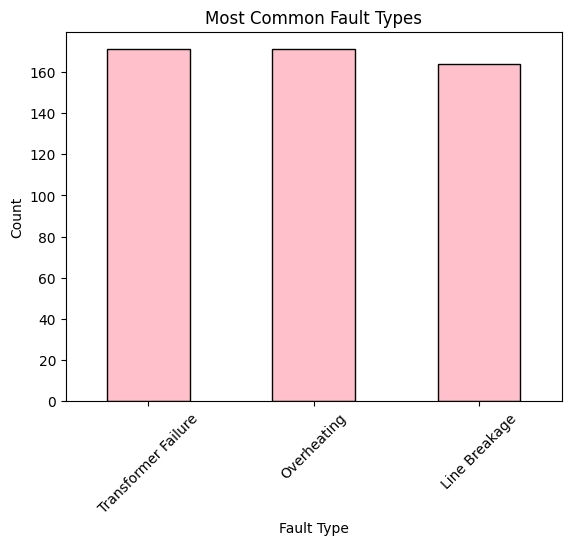

In [14]:
# Plot a bar chart of fault types
fault_counts.plot(kind='bar', color='pink', edgecolor='black')
plt.title("Most Common Fault Types")
plt.xlabel("Fault Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Observations from the chat above

- Transformer Failure and overheating appears to be the most common fault (estimated near 170 occurrences).
- Line Breakage follow, with about 160 occurances .
- The chart suggests prioritizing Transformer Failure and Overheating in maintenance or troubleshooting efforts.

**Check if higher temperatures lead to increased load/failures**

In [15]:
# Create temperature bins
df_fault_data['temperature_range'] = pd.cut(df_fault_data['temperature_(°c)'], bins=[0, 10, 20, 30, 40, 50], labels=['0-10°C','10-20°C', '20-30°C', '30-40°C', '40-50°C'])

# Calculate correlation matrix
correlation_matrix = df_fault_data[['temperature_(°c)', 'power_load_(mw)', 'duration_of_fault_(hrs)', 'down_time_(hrs)']].corr()
#df_fault_data.info()


# Display correlation value
print("Correlation between Temperature and Power Load:")
print(correlation_matrix)

Correlation between Temperature and Power Load:
                         temperature_(°c)  power_load_(mw)  \
temperature_(°c)                 1.000000         0.088662   
power_load_(mw)                  0.088662         1.000000   
duration_of_fault_(hrs)         -0.051422         0.064723   
down_time_(hrs)                  0.053460        -0.013752   

                         duration_of_fault_(hrs)  down_time_(hrs)  
temperature_(°c)                       -0.051422         0.053460  
power_load_(mw)                         0.064723        -0.013752  
duration_of_fault_(hrs)                 1.000000         0.018813  
down_time_(hrs)                         0.018813         1.000000  


Visualize the Correlation

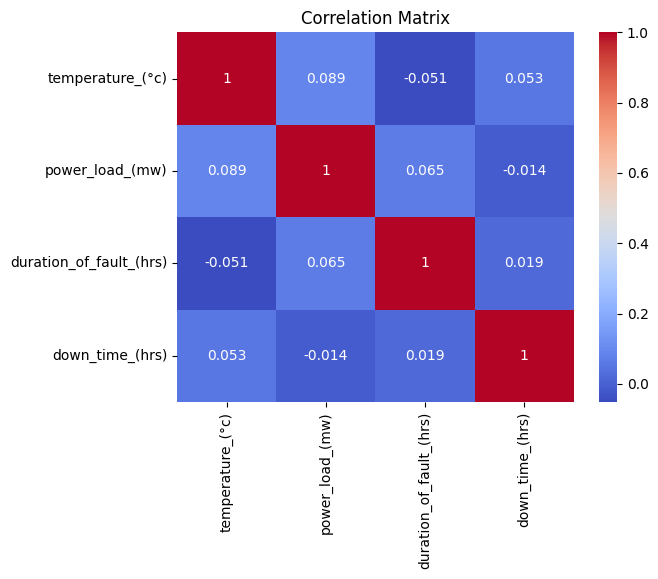

In [16]:
# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
# Compute correlation
#correlation = df_fault_data[['temperature_(°c)', 'power_load_(mw)']].corr()

Aggregate data by temperature ranges to see trend

In [17]:
# Group by temperature ranges and calculate averages
temperature_analysis = df_fault_data.groupby('temperature_range').agg({
    'power_load_(mw)': 'mean',
    'fault_id': 'count',  # Number of faults
    'down_time_(hrs)': 'sum'
}).reset_index()

print(temperature_analysis)

  temperature_range  power_load_(mw)  fault_id  down_time_(hrs)
0            0-10°C              NaN         0              0.0
1           10-20°C        49.352941        17             64.4
2           20-30°C        49.814346       237            930.6
3           30-40°C        50.242063       252           1028.9
4           40-50°C              NaN         0              0.0


C:\Users\maryo\AppData\Local\Temp\ipykernel_17936\2850022890.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temperature_analysis = df_fault_data.groupby('temperature_range').agg({


Visualize Trends

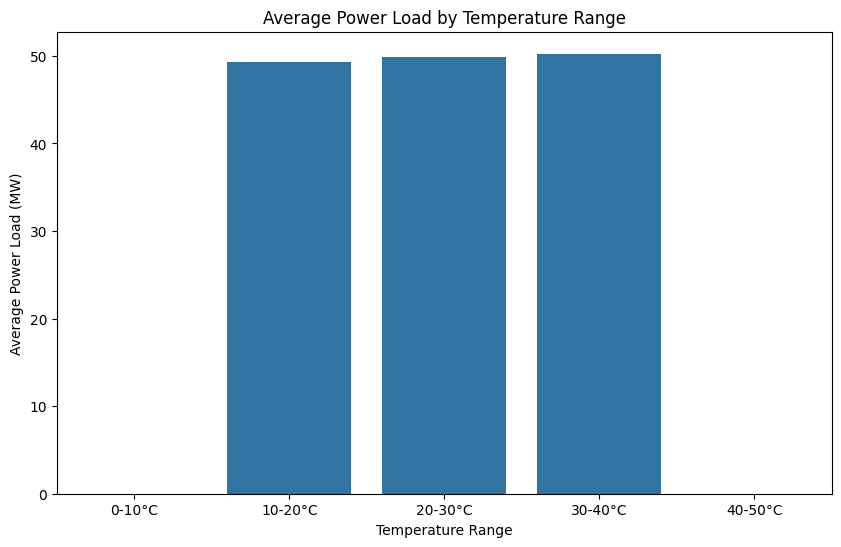

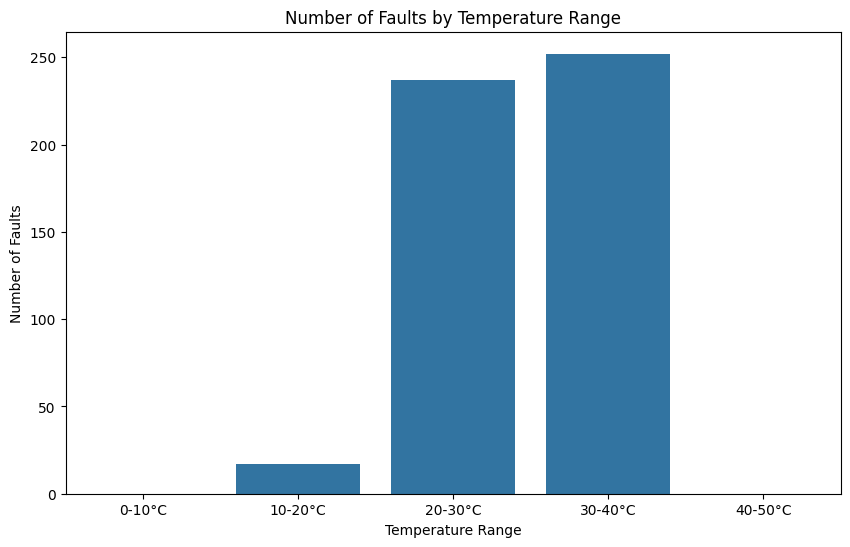

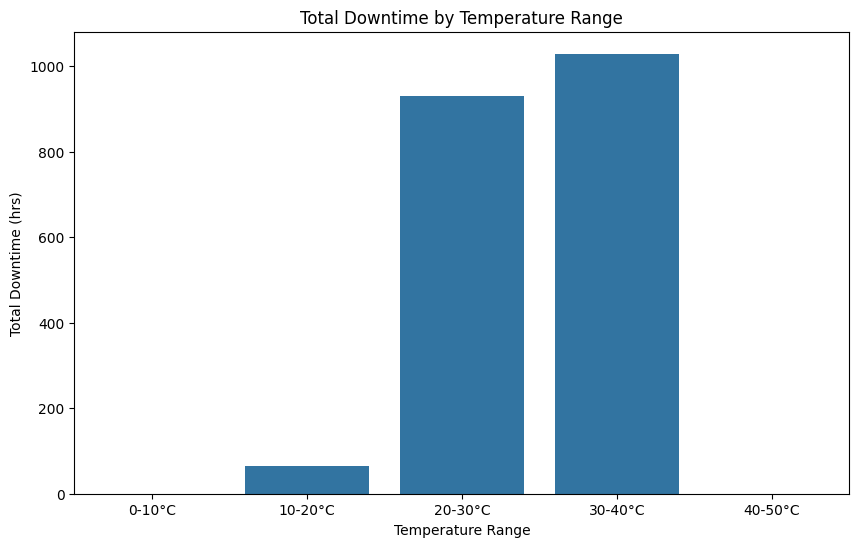

In [18]:
# Plot power load vs temperature
plt.figure(figsize=(10, 6))
sns.barplot(x='temperature_range', y='power_load_(mw)', data=temperature_analysis)
plt.title('Average Power Load by Temperature Range')
plt.xlabel('Temperature Range')
plt.ylabel('Average Power Load (MW)')
plt.show()

# Plot number of faults vs temperature
plt.figure(figsize=(10, 6))
sns.barplot(x='temperature_range', y='fault_id', data=temperature_analysis)
plt.title('Number of Faults by Temperature Range')
plt.xlabel('Temperature Range')
plt.ylabel('Number of Faults')
plt.show()

# Plot total downtime vs temperature
plt.figure(figsize=(10, 6))
sns.barplot(x='temperature_range', y='down_time_(hrs)', data=temperature_analysis)
plt.title('Total Downtime by Temperature Range')
plt.xlabel('Temperature Range')
plt.ylabel('Total Downtime (hrs)')
plt.show()

Key Observations

A correlation analysis between temperature and power load showed a weak relationship (0.0886), suggesting that while temperature variations exist, they may not be the primary driver of increased load or failures. Upon further Analysis

Temperature impacts faults, but only within the 20–40°C range. This non-linear pattern implies:

Critical Risk Zone: 20–40°C requires prioritized interventions.

Extremes Are Safe (or Unobserved): Further data validation needed for 0–10°C and 40–50°C.

Recommendation:

Target maintenance and cooling upgrades for temperatures above 20°C, where 97% of faults occur (480/500 total). Investigate why extremes show zero faults to rule out data gaps.



**See if high wind speeds during storms increase faults**

In [19]:

# Define stormy weather conditions
storm_conditions = ['Windstorm', 'Thunderstorm', 'Heavy Rain', 'Snowstorm']

# Create a new column to classify stormy vs. non-stormy weather
df_fault_data['Stormy'] = df_fault_data['weather_condition'].isin(storm_conditions)

# Group fault counts by wind speed and stormy condition
fault_counts = df_fault_data.groupby(['wind_speed_(km/h)', 'Stormy'])['fault_id'].count().unstack()

# Fill NaN values with 0
fault_counts = fault_counts.fillna(0)

# Display the grouped fault counts
fault_counts



Stormy,False,True
wind_speed_(km/h),,
10,14,9
11,11,9
12,9,4
13,23,14
14,25,4
15,23,8
16,13,12
17,16,5
18,17,14


Visualization

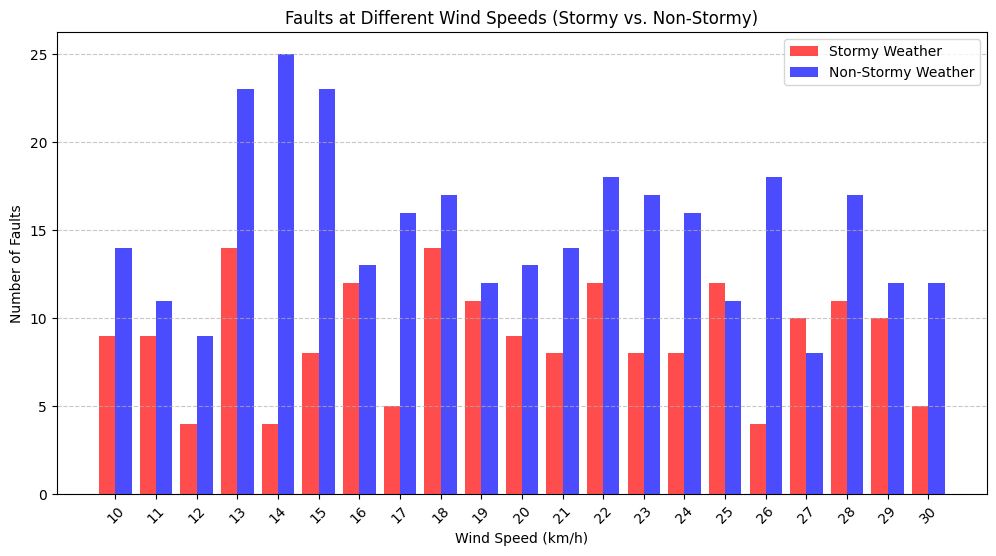

In [20]:


# Extract data for plotting
wind_speeds = fault_counts.index
stormy_faults = fault_counts[True]
non_stormy_faults = fault_counts[False]

# Set bar width and positions
bar_width = 0.4
x = np.arange(len(wind_speeds))

# Create clustered bar chart
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, stormy_faults, bar_width, label='Stormy Weather', color='red', alpha=0.7)
plt.bar(x + bar_width/2, non_stormy_faults, bar_width, label='Non-Stormy Weather', color='blue', alpha=0.7)

# Formatting the plot
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Number of Faults")
plt.title("Faults at Different Wind Speeds (Stormy vs. Non-Stormy)")
plt.xticks(ticks=x, labels=wind_speeds, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


In [21]:
# Convert 'Fault ID' count to numeric for correlation calculation
df_fault_data['fault_count'] = df_fault_data.groupby('wind_speed_(km/h)')['fault_id'].transform('count')

# Compute correlation between wind speed and number of faults
correlation = df_fault_data[['wind_speed_(km/h)', 'fault_count']].corr()

# Display correlation result
correlation


,wind_speed_(km/h),fault_count
wind_speed_(km/h),1.000000,-0.300883
fault_count,-0.300883,1.000000


**Identify the most severe faults requiring long recovery times**

In [22]:
# Calculate the 90th percentile for downtime and duration
downtime_threshold = df_fault_data['down_time_(hrs)'].quantile(0.9)
duration_threshold = df_fault_data['duration_of_fault_(hrs)'].quantile(0.9)

# Filter severe faults
severe_faults = df_fault_data[(df_fault_data['down_time_(hrs)'] >= downtime_threshold) | (df_fault_data['duration_of_fault_(hrs)'] >= duration_threshold)]
print(severe_faults)

    fault_id           fault_type fault_location_(latitude,_longitude)  \
5       F006          Overheating                     (34.05, -118.24)   
11      F012  Transformer Failure                  (34.0465, -118.623)   
17      F018        Line Breakage                 (34.1619, -118.6775)   
19      F020        Line Breakage                  (34.668, -118.6576)   
34      F035  Transformer Failure                 (34.8153, -118.2817)   
..       ...                  ...                                  ...   
487     F488        Line Breakage                 (34.7611, -118.0196)   
493     F494  Transformer Failure                 (34.9919, -118.4969)   
494     F495          Overheating                 (34.1828, -118.3112)   
503     F504  Transformer Failure                  (34.979, -118.5646)   
505     F506        Line Breakage                 (34.4455, -118.5557)   

     voltage_(v)  current_(a)  power_load_(mw)  temperature_(°c)  \
5           2150          220              

Check which fault types are most common among severe faults

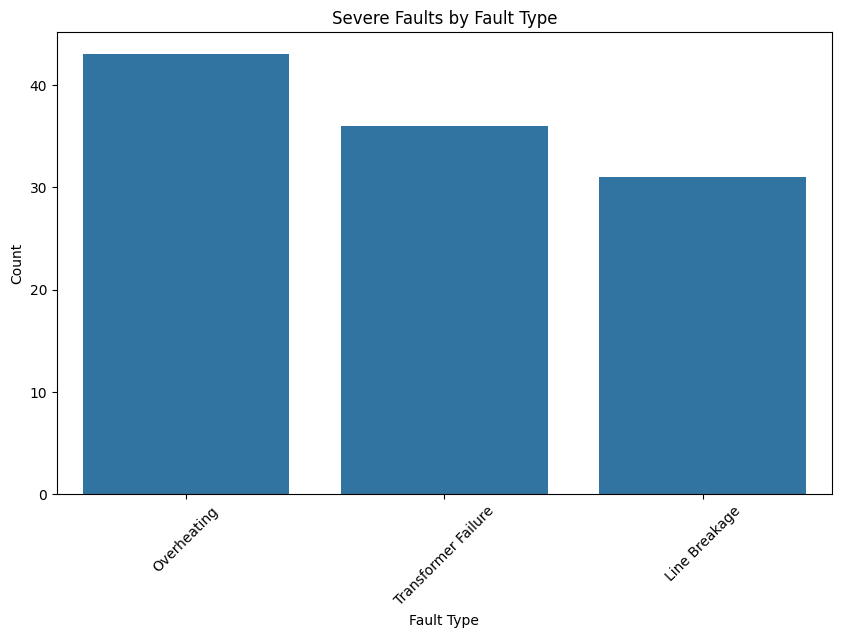

In [23]:
severe_fault_type_distribution = severe_faults['fault_type'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=severe_fault_type_distribution.index, y=severe_fault_type_distribution.values)
plt.title('Severe Faults by Fault Type')
plt.xlabel('Fault Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



Check the relationship between downtime and fault duration

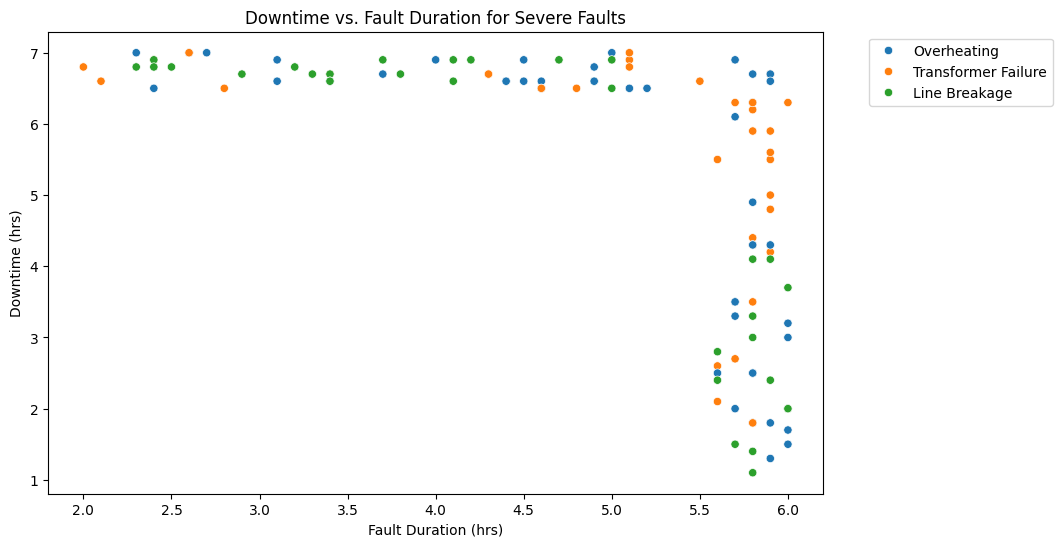

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_of_fault_(hrs)', y='down_time_(hrs)', data=severe_faults, hue='fault_type')
plt.title('Downtime vs. Fault Duration for Severe Faults')
plt.xlabel('Fault Duration (hrs)')
plt.ylabel('Downtime (hrs)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Component Health vs. Faults**

C:\Users\maryo\AppData\Local\Temp\ipykernel_17936\2351691332.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=health_analysis.index, y=health_analysis.values, palette="magma")


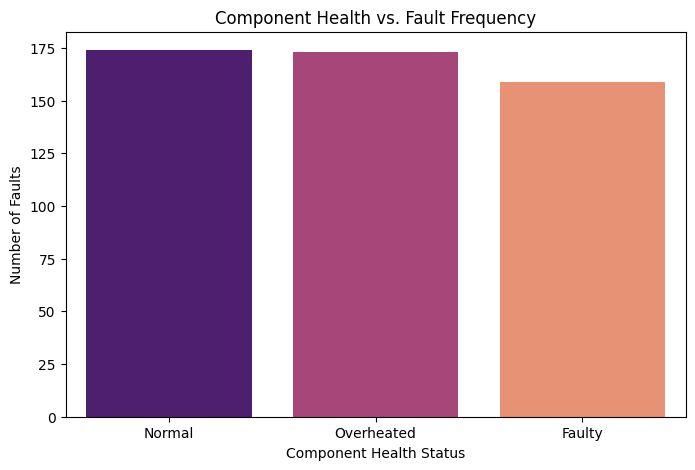

In [25]:
# Count faults based on component health
health_analysis = df_fault_data["component_health"].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=health_analysis.index, y=health_analysis.values, palette="magma")
plt.xlabel("Component Health Status")
plt.ylabel("Number of Faults")
plt.title("Component Health vs. Fault Frequency")
plt.show()

An assessment of component health and fault occurrences highlighted that poor component conditions are often linked to failures, reinforcing the importance of regular maintenance